## Visualization of Sentiment Trends

C:\Users\Revanasidda\AppData\Local\Temp\ipykernel_11404\2249097268.py:8: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'])  # Make sure the column name matches your dataset


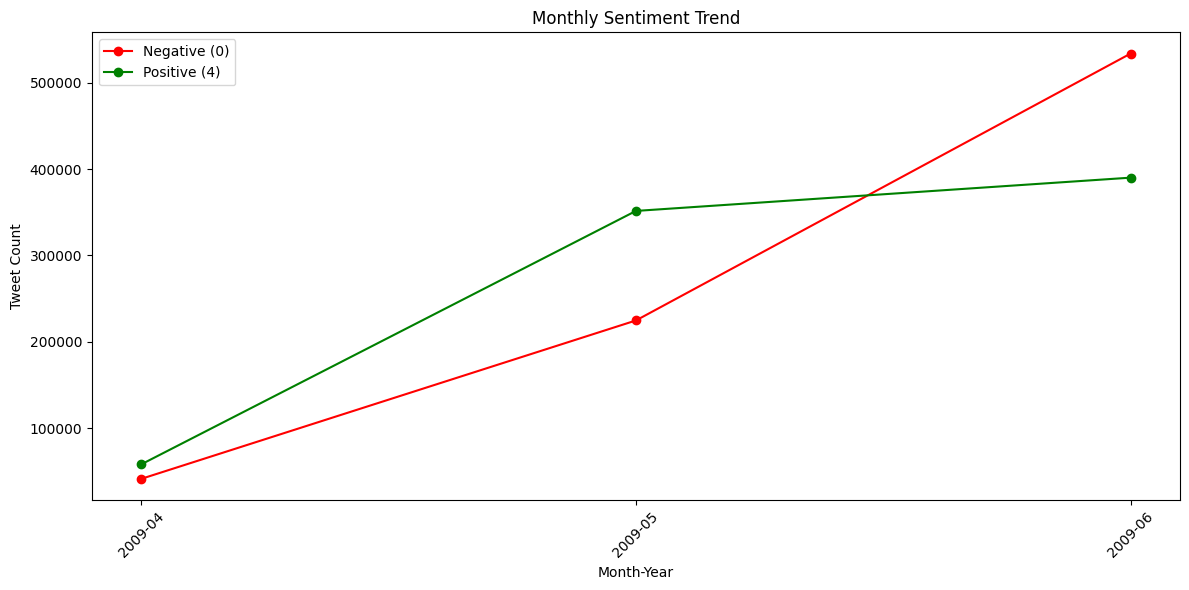

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (update filename and column names as needed)
df = pd.read_csv('../twitter_data_cleaned.csv', encoding = 'ISO-8859-1')

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])  # Make sure the column name matches your dataset

# Create a new column for month and year
df['month_year'] = df['date'].dt.to_period('M').astype(str)

# Filter sentiment counts
monthly_counts = df.groupby(['month_year', 'target']).size().unstack(fill_value=0).sort_index()

# Extract months and counts
months = monthly_counts.index.tolist()
neg_counts = monthly_counts.get(0, pd.Series([0]*len(months))).tolist()  # Sentiment = 0 (Negative)
pos_counts = monthly_counts.get(4, pd.Series([0]*len(months))).tolist()  # Sentiment = 4 (Positive)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(months, neg_counts, color='red', marker='o', label='Negative (0)')
plt.plot(months, pos_counts, color='green', marker='o', label='Positive (4)')
plt.title('Monthly Sentiment Trend')
plt.xlabel('Month-Year')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
